# Regression over housing details California -    

In [25]:
import numpy as np 
import pandas as pd 

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 

%matplotlib inline 
import matplotlib as mlp 
import matplotlib.pyplot as plt 

In [26]:
import tensorflow as tf 
from tensorflow import keras 

In [27]:
np.random.seed(42) 
tf.random.set_seed(42) 

Loading housing dataset -  

In [28]:
from sklearn.datasets import fetch_california_housing 
housing = fetch_california_housing() 

In [29]:
housing.feature_names 

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [30]:
x_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42) 
X_train, X_valid, y_train, y_valid = train_test_split(x_train_full, y_train_full, random_state=42)   

print(f"Train_full size :\n{x_train_full.shape}\n{y_train_full.shape}\nTest size : \n{X_test.shape}\n{y_test.shape}") 
print(f"\nTrain size :\n{X_train.shape}\n{y_train.shape}\nValid^n size : \n{X_valid.shape}\n{y_valid.shape}") 

Train_full size :
(15480, 8)
(15480,)
Test size : 
(5160, 8)
(5160,)

Train size :
(11610, 8)
(11610,)
Valid^n size : 
(3870, 8)
(3870,)


In [31]:
scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train) 
X_valid = scaler.transform(X_valid) 
X_test = scaler.transform(X_test) 

# Keras neural network model -  

In [32]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]), 
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(1)
])

model.summary() 

d:\Machine_Learning_PY\virtl_env\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 30)             │           270 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,231 (4.81 KB)

 Trainable params: 1,231 (4.81 KB)

 Non-trainable params: 0 (0.00 B)

Model comparision and showcase -  

In [33]:
model.compile(loss='mean_squared_error',
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=['mae']) 


In [34]:
model_history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid)) 
print(f"Model parameters : {model_history.params}") 
print(f"Model history : \n{model_history.history}") 

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.3644 - mae: 1.1468 - val_loss: 0.8246 - val_mae: 0.6589
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8326 - mae: 0.6713 - val_loss: 0.6853 - val_mae: 0.6118
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7484 - mae: 0.6359 - val_loss: 0.6345 - val_mae: 0.5862
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6978 - mae: 0.6116 - val_loss: 0.5923 - val_mae: 0.5643
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6563 - mae: 0.5914 - val_loss: 0.5577 - val_mae: 0.5456
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6196 - mae: 0.5731 - val_loss: 0.5276 - val_mae: 0.5294
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5870 - mae: 0.5566 - val_loss: 0.5015 - val_mae: 0.5150
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5583 - mae: 0.5418 - val_loss: 0.4792 - val_mae: 0.5019
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - lo

# Model Performance -  

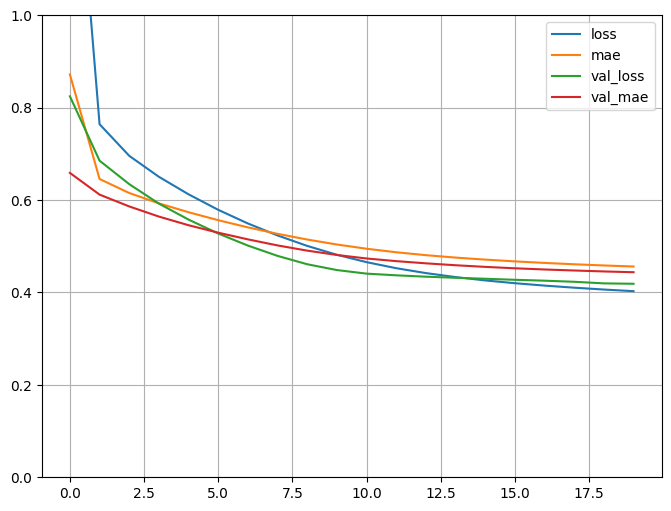

In [35]:
pd.DataFrame(model_history.history).plot(figsize=(8,6))  
plt.grid(True) 
plt.gca().set_ylim(0,1) 
plt.show() 

In [36]:
mae_test = model.evaluate(X_test, y_test) 

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3961 - mae: 0.4522


In [37]:
X_new = X_test[:3] 
X_new 

array([[-1.15780104, -0.28673138, -0.49550877, -0.16618097, -0.02946012,
         0.38899735,  0.19374821,  0.2870474 ],
       [-0.7125531 ,  0.10880952, -0.16332973,  0.20164652,  0.12842117,
        -0.11818174, -0.23725261,  0.06215231],
       [-0.2156101 ,  1.8491895 , -0.57982788,  0.18528489, -0.10429403,
        -0.67694905,  1.00890193, -1.4271529 ]])

In [38]:
y_pred = model.predict(X_new) 
print(f"Prediction value = {y_pred}") 
print(f"Test value = {y_test[:3]}") 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Prediction value = [[0.882358 ]
 [1.6093647]
 [3.506319 ]]
Test value = [0.477   0.458   5.00001]


# Functional API -  

Some NN models have complex topologies rather than sequential. Some may have multiple input or multiple output.  

In [39]:
tf.keras.backend.clear_session() 
tf.compat.v1.reset_default_graph() 

In [40]:
input_ = keras.layers.Input(shape=X_train.shape[1:]) 
hidden1 = keras.layers.Dense(30, activation='relu')(input_)  
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1) 
concat = keras.layers.concatenate([input_, hidden2]) 
output = keras.layers.Dense(1)(concat) 

model2 = keras.models.Model(inputs=[input_], outputs=[output]) 
model2.summary() 

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 8)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 30)        │        270 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 30)        │        930 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 38)        │          0 │ input_layer[0][0… │
│ (Concatenate)       │                   │            │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 1)         │         39 │ concatenate[0][0] │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,239 (4.84 KB)

 Trainable params: 1,239 (4.84 KB)

 Non-trainable params: 0 (0.00 B)

New Model performance -  

In [41]:
model2.compile(loss='mean_squared_error', optimizer=keras.optimizers.SGD(learning_rate=1e-3), metrics=['mae']) 

In [42]:
model2_history = model2.fit(X_train, y_train, epochs=40, validation_data=(X_valid, y_valid)) 
print(f"Model_2 parameters : {model2_history.params}") 
print(f"Model_2 history : \n{model2_history.history}") 

Epoch 1/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.6899 - mae: 1.5228 - val_loss: 1.2264 - val_mae: 0.6601
Epoch 2/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7657 - mae: 0.6467 - val_loss: 0.7896 - val_mae: 0.5876
Epoch 3/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6655 - mae: 0.5970 - val_loss: 0.7278 - val_mae: 0.5570
Epoch 4/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6172 - mae: 0.5708 - val_loss: 0.5375 - val_mae: 0.5315
Epoch 5/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5811 - mae: 0.5524 - val_loss: 0.5491 - val_mae: 0.5186
Epoch 6/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5530 - mae: 0.5378 - val_loss: 0.4776 - val_mae: 0.5019
Epoch 7/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5309 - mae: 0.5265 - val_loss: 0.4845 - val_mae: 0.4957
Epoch 8/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5131 - mae: 0.5174 - val_loss: 0.4503 - val_mae: 0.4855
Epoch 9/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - lo

In [43]:
mae_test = model2.evaluate(X_test, y_test) 
mae_test 

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3724 - mae: 0.4308


[0.3688974976539612, 0.4305011034011841]

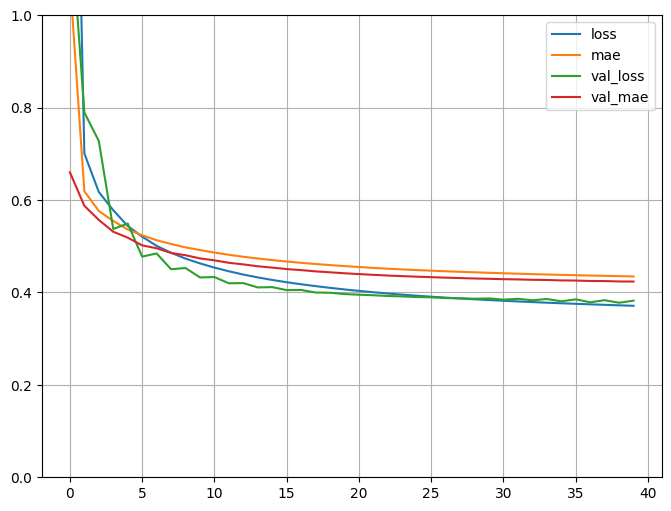

In [44]:
pd.DataFrame(model2_history.history).plot(figsize=(8,6))  
plt.grid(True) 
plt.gca().set_ylim(0,1) 
plt.show() 

# Saving models  

In [46]:
# model.save("sequencial_model.h5") 
# model2.save("func_api_model.h5") 

model.save("sequencial_model.keras") 
model2.save("func_api_model.keras") 